<a href="https://colab.research.google.com/github/AditiRavi/Hate-Speech-Recognition/blob/main/Hate_Speech_Recognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score

import os

import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
tweets_df = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/twitter_labeled_data.csv')

In [ ]:
tweets_df = tweets_df.drop(['neither','Unnamed: 0','count','hate_speech','offensive_language'], axis= 1)

In [ ]:
tweets_df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
def message_cleaning(message):
    Test_punc_removed = [
        char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split(
    ) if word.lower() not in stopwords.words('english')]
    Test_punc_removed_join_clean_join = ' '.join(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean_join

In [ ]:
hatespeech = tweets_df[tweets_df['class'] == 0]
offensive = tweets_df[tweets_df['class'] == 1]
neutral = tweets_df[tweets_df['class'] == 2]

In [ ]:
tweets_df_clean = pd.DataFrame(columns=['class', 'tweet'])
tweets_df_clean['tweet'] = tweets_df['tweet'].apply(message_cleaning)
tweets_df_clean['class'] = tweets_df['class']

In [ ]:
tweets_df_clean.head()

,class,tweet
0,2,RT mayasolovely woman shouldnt complain cleani...
1,1,RT mleew17 boy dats coldtyga dwn bad cuffin da...
2,1,RT UrKindOfBrand Dawg RT 80sbaby4life ever fuc...
3,1,RT CGAnderson vivabased look like tranny
4,1,RT ShenikaRoberts shit hear might true might f...


In [ ]:
print(tweets_df_clean['tweet'][5]) 
print(tweets_df['tweet'][5])

TMadisonx shit blows meclaim faithful somebody still fucking hoes 128514128514128514
!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"


In [ ]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df_clean['tweet']).toarray()

In [ ]:
X = tweets_countvectorizer
y = np.array(pd.get_dummies(tweets_df_clean['class']))

In [ ]:
X.shape

(24783, 63)

In [ ]:
y.shape

(24783, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train.shape

total_words = 200
total_words

200

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

In [ ]:
model1 = Sequential()

model1.add(Embedding(total_words, output_dim = 32))
model1.add(LSTM(32))
model1.add(RepeatVector(200))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))

model1.add(Dense(3,activation= 'softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 32)          6400      
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                8320      
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 200, 32)           0         
_________________________________________________________________
global_average_pooling1d_13  (None, 32)                0         
_________________________________________________________________
dense_138 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_139 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_140 (Dense)            (None, 3)               

In [ ]:
history = model1.fit(X_train, y_train, batch_size = 256, validation_split = 0.1, epochs = 100)

Epoch 1/100
79/79 [==============================] - 8s 77ms/step - loss: 0.7652 - acc: 0.7607 - val_loss: 0.6455 - val_acc: 0.7808
Epoch 2/100
79/79 [==============================] - 5s 70ms/step - loss: 0.6571 - acc: 0.7752 - val_loss: 0.6399 - val_acc: 0.7808
Epoch 3/100
79/79 [==============================] - 6s 70ms/step - loss: 0.6540 - acc: 0.7752 - val_loss: 0.6377 - val_acc: 0.7808
Epoch 4/100
79/79 [==============================] - 5s 69ms/step - loss: 0.6510 - acc: 0.7752 - val_loss: 0.6332 - val_acc: 0.7808
Epoch 5/100
79/79 [==============================] - 5s 69ms/step - loss: 0.6492 - acc: 0.7752 - val_loss: 0.6330 - val_acc: 0.7808
Epoch 6/100
79/79 [==============================] - 6s 70ms/step - loss: 0.6484 - acc: 0.7752 - val_loss: 0.6310 - val_acc: 0.7808
Epoch 7/100
79/79 [==============================] - 6s 70ms/step - loss: 0.6467 - acc: 0.7753 - val_loss: 0.6310 - val_acc: 0.7808
Epoch 8/100
79/79 [==============================] - 6s 70ms/step - loss: 0.

In [ ]:
model1.evaluate(X_test,y_test)

78/78 [==============================] - 1s 8ms/step - loss: 0.6072 - acc: 0.7761


[0.6071586012840271, 0.7761194109916687]

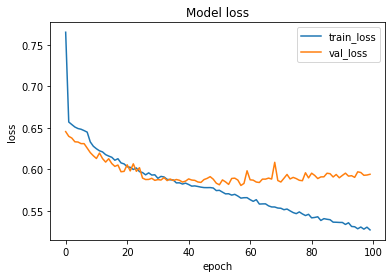

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

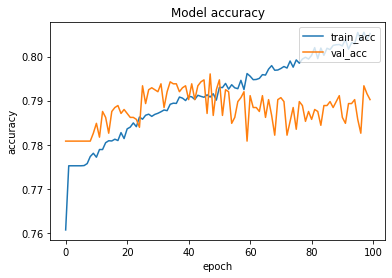

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

In [ ]:
model1.save("hate_speech.h5")

In [ ]:
model1.evaluate(X_test,y_test)

78/78 [==============================] - 1s 8ms/step - loss: 0.6072 - acc: 0.7761


[0.6071586012840271, 0.7761194109916687]

In [ ]:
print(tweets_df['tweet'][0])
print(tweets_df['tweet'][1])
print(tweets_df['tweet'][2])
print(tweets_df['tweet'][3])
print(tweets_df['tweet'][4])

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [ ]:
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet'][:5]).toarray()

In [ ]:
preds = model1.predict(tweets_countvectorizer)

In [ ]:
preds_class = []
for i in range(len(preds)):
    preds_class.append(np.argmax(preds[i]))
preds_class = np.array(preds_class) 

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = preds_class
df['Actual Labels'] = tweets_df['class'][:5]
df.head()

,Predicted Labels,Actual Labels
0,2,2
1,2,1
2,1,1
3,1,1
4,1,1


In [ ]:
from tensorflow import keras
hate_speech_model = keras.models.load_model("hate_speech.h5")

In [ ]:
hate_speech_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 32)          6400      
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                8320      
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 200, 32)           0         
_________________________________________________________________
global_average_pooling1d_13  (None, 32)                0         
_________________________________________________________________
dense_138 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_139 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_140 (Dense)            (None, 3)               

In [ ]:
loss, acc=hate_speech_model.evaluate(X_test,y_test,verbose=2)

78/78 - 1s - loss: 0.6072 - acc: 0.7761
